In [13]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.Series(diabetes.target, name='target')
df = pd.concat([data, target], axis=1)

In [14]:
import pandas as pd
import tabularmagic as tm

In [15]:
mtcars = pd.read_csv("mtcars_data/mtcars.csv")
mtcars.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [16]:
analyzer = tm.Analyzer(mtcars, test_size=0.0, name='mtcars dataset from r')
analyzer

WARN: No test DataFrame provided. The test DataFrame will be treated as a train 
      DataFrame copy. 
INFO: Analyzer initialized. Shapes of train, test DataFrames: (32, 11), (32, 11). 


mtcars dataset from r 
----------------------------------------------------------------------------------------
Train shape: (32, 11)                       Test shape: (32, 11)                        
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numeric variables:
  'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' 

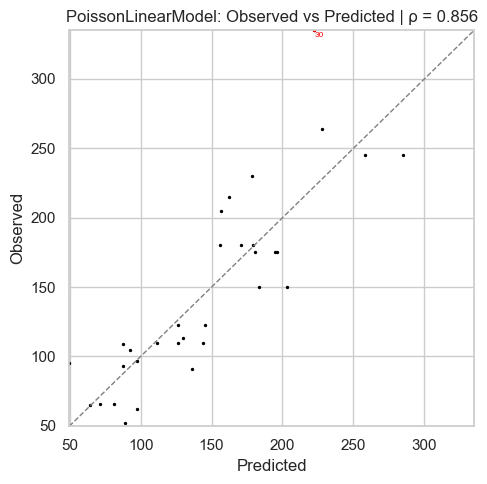

In [17]:
lm_report = analyzer.glm(
    formula='hp ~ am + qsec',
    family = "poisson"
)

#basic_lm = analyzer.lm(formula = 'hp ~ am + qsec')

#type(lm_report)


#print(lm_report.statsmodels_summary())
#print(lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson', show_outliers = 'standardized'))
lm_report.train_report().plot_obs_vs_pred()

#.plot_obs_vs_pred()
#lm_report.step()
#basic_lm.train_report().plot_obs_vs_pred()


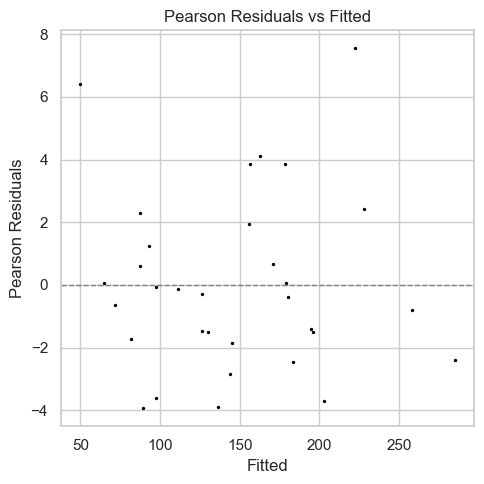

In [18]:
lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson')

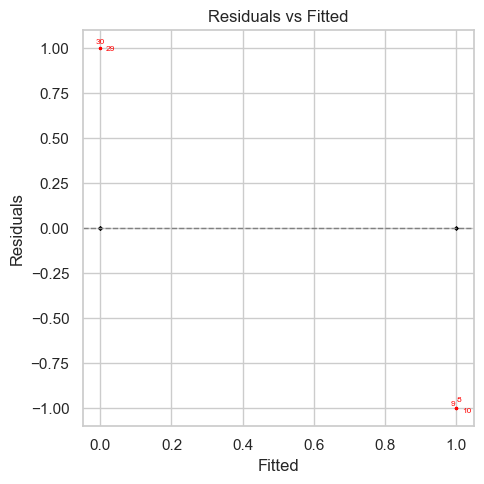

In [19]:
bin_report = analyzer.glm(
    formula='am ~ drat',
    family = "binomial"
)
bin_report.train_report().plot_residuals_vs_fitted()


In [23]:
# Test to see if partialF works

lm_report_red = analyzer.lm(
    formula='hp ~ am + qsec'
)

lm_report_full = analyzer.lm(
    formula='hp ~ am + qsec + gear'
)

#Confirm it works both ways:

lm_report_full.test_partialf(lm_report_red)
lm_report_red.test_partialf(lm_report_full)

lm_report_red.test_lr(lm_report_full)
lm_report_full.test_lr(lm_report_red)

lm_report_red.test_partialf(lm_report_full).statistic()

<bound method StatisticalTestResult.statistic of <tabularmagic._src.exploratory.stattests.StatisticalTestResult object at 0x00000230929C9790>>

In [9]:
# Confirm that value error is raised when we do not have a subset

lm_report_red = analyzer.lm(
    formula='hp ~ am + qsec + wt'
)

lm_report_full = analyzer.lm(
    formula='hp ~ am + qsec + gear + drat'
)

lm_report_red.test_lr(lm_report_full)
lm_report_full.test_lr(lm_report_red)

ValueError: One model must be a reduced version of the other

In [11]:
# test lr and partialf tests with poisson:

lm_report_red = analyzer.glm(
    formula='hp ~ am + qsec',
    family = "poisson"
)

lm_report_full = analyzer.glm(
    formula='hp ~ am + qsec + gear',
    family = "poisson"
)


#lm_report_red.test_lr(lm_report_full)
#lm_report_full.test_lr(lm_report_red)
lm_report_full.test_partialf(lm_report_red)


AttributeError: 'GLMResults' object has no attribute 'compare_f_test'